In [ ]:
""" 
Gaol: EDA of level 03
Author: Rudra Prasad Bhuyan
"""

In [2]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [33]:
colors = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59']  
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

palette = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59', '#ccff33', '#ff36ab', '#e0fbfc', '#3772ff', '#45062e']  
sns.set_palette(palette)


In [7]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-03\data2\lev_03_mp_clean.parquet"

pdf = pl.read_parquet(path)
pdf.collect_schema()

Schema([('FSU_Serial_No', Int32),
        ('HH_Size_FDQ', Int32),
        ('Household_Type', Int32),
        ('Religion_of_HH_Head', Int32),
        ('Land_Ownership', Int32),
        ('Type_of_Land_Owned', Int32),
        ('Total_Area_Land_Owned_Acres', Int32),
        ('Energy_Source_Cooking', Int32),
        ('Energy_Source_Lighting', Int32),
        ('Dwelling_Unit_Exists', Int32),
        ('Type_of_Dwelling_Unit', Int32),
        ('Rent_Rate_Available_Rural', String),
        ('Multiplier', Int32),
        ('Self_Employment_Source_Sector', Int32),
        ('Regular_Wage_Source_Sector', Int32),
        ('Casual_Labour_Source_Sector', Int32),
        ('Engaged_in_Economic_Activity_Las', Int32),
        ('Max_Income_Activity', Int32),
        ('Benefitted_From_PMGKY', Int32)])

# 1. Basic Descriptive Questions

## What is the **average household size (`HH_Size_FDQ`)**?

In [8]:
pdf['HH_Size_FDQ'].describe()

statistic,value
str,f64
"""count""",56420.0
"""null_count""",0.0
"""mean""",4.598653
"""std""",2.152007
"""min""",1.0
"""25%""",3.0
"""50%""",4.0
"""75%""",6.0
"""max""",31.0


In [21]:
hh_size_count = pdf['HH_Size_FDQ'].value_counts().to_pandas()
hh_size_count

,HH_Size_FDQ,count
0,7,3568
1,15,32
2,4,13968
3,1,2692
4,31,4
5,2,6080
6,14,84
7,18,4
8,3,7488
9,10,792


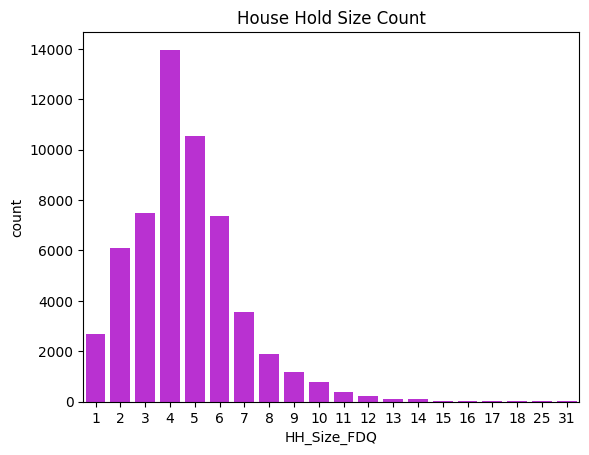

In [23]:
sns.barplot(hh_size_count, 
            x=hh_size_count['HH_Size_FDQ'], 
            y=hh_size_count['count']
)

plt.title('House Hold Size Count')
plt.show()

## How are households distributed by **type (`Household_Type`)**?

In [ ]:
pdf['Household_Type'].value_counts()

Household_Type,count
i32,u32
6,5084
1,25728
4,1808
5,6728
2,10268
3,3556
9,3248


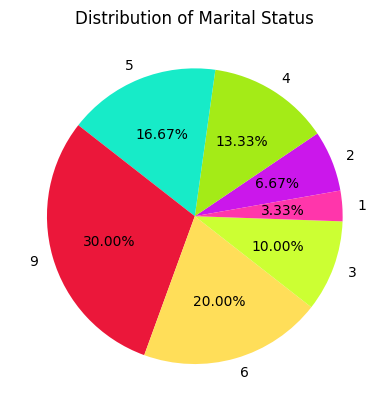

In [35]:
hh_type_count_df = pdf['Household_Type'].value_counts(normalize=True).to_pandas()
plt.pie(hh_type_count_df['Household_Type'], 
        labels=hh_type_count_df['Household_Type'],
    autopct='%1.2f%%',                            
    startangle=10
)
plt.title("Distribution of Marital Status")
plt.show()